<a href="https://colab.research.google.com/github/lukmanprasetyo/Business-Model-Canvas-BMC-/blob/main/PresentDataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://medium.com/codex/building-and-visualizing-decision-tree-in-python-2cfaafd8e1bb

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = '/content/drive/MyDrive/dataset'

In [ ]:
%cd drive/MyDrive/dataset/

/content/drive/MyDrive/dataset


In [ ]:
!kaggle datasets download -d prathamtripathi/drug-classification

  0% 0.00/1.68k [00:00<?, ?B/s]
100% 1.68k/1.68k [00:00<00:00, 60.1kB/s]


In [ ]:
!unzip drug-classification

Archive:  drug-classification.zip
  inflating: drug200.csv             


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('drug.csv')
df


,penghasilan,pekerjaan,hubungansosial,statusrumah,layakkredit
0,rendah,asn,buruk,kontrak,tidak layak
1,tinggi,swasta,baik,hm,layak
2,rendah,pengusaha,buruk,hm,tidak layak
3,rendah,pengusaha,baik,kontrak,layak
4,sedang,swasta,baik,kontrak,tidak layak
5,rendah,swasta,baik,hm,layak
6,rendah,asn,buruk,hm,tidak layak
7,sedang,pengusaha,buruk,hm,layak
8,sedang,swasta,baik,hm,layak
9,sedang,pengusaha,buruk,kontrak,tidak layak


In [ ]:
print(cl(df.head(), attrs = ['bold']))

  penghasilan  pekerjaan hubungansosial statusrumah  layakkredit
0      rendah        asn          buruk     kontrak  tidak layak
1      tinggi     swasta           baik          hm        layak
2      rendah  pengusaha          buruk          hm  tidak layak
3      rendah  pengusaha           baik     kontrak        layak
4      sedang     swasta           baik     kontrak  tidak layak


In [ ]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
from termcolor import colored as cl # text customization

from sklearn.tree import DecisionTreeClassifier as dtc # tree algorithm
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.metrics import accuracy_score # model precision
from sklearn.tree import plot_tree # tree diagram

rcParams['figure.figsize'] = (25, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   penghasilan     14 non-null     object
 1   pekerjaan       14 non-null     object
 2   hubungansosial  14 non-null     object
 3   statusrumah     14 non-null     object
 4   layakkredit     14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [ ]:
for i in df.penghasilan.values:
    if i  == 'rendah':
        df.penghasilan.replace(i, 0, inplace = True)
    elif i == 'sedang':
        df.penghasilan.replace(i, 1, inplace = True)
    elif i == 'tinggi':
        df.penghasilan.replace(i, 2, inplace = True)

for i in df.pekerjaan.values:
    if i == 'asn':
        df.pekerjaan.replace(i, 0, inplace = True)
    elif i == 'swasta':
        df.pekerjaan.replace(i, 1, inplace = True)
    elif i == 'pengusaha':
        df.pekerjaan.replace(i, 2, inplace = True)

for i in df.hubungansosial.values:
    if i  == 'buruk':
        df.hubungansosial.replace(i, 0, inplace = false)
    else:
        df.hubungansosial.replace(i, 1, inplace = True)

for i in df.statusrumah.values:
    if i  == 'kontrak':
        df.statusrumah.replace(i, 0, inplace = false)
    else:
        df.statusrumah.replace(i, 1, inplace = True)

print(cl(df, attrs = ['bold']))

    penghasilan  pekerjaan  hubungansosial  statusrumah  layakkredit
0             1          0               1            1  tidak layak
1             1          1               1            1        layak
2             1          2               1            1  tidak layak
3             1          2               1            1        layak
4             1          1               1            1  tidak layak
5             1          1               1            1        layak
6             1          0               1            1  tidak layak
7             1          2               1            1        layak
8             1          1               1            1        layak
9             1          2               1            1  tidak layak
10            1          2               1            1        layak
11            1          0               1            1        layak
12            1          2               1            1        layak
13            1          0        

In [ ]:
X_var = df[['penghasilan', 'pekerjaan', 'hubungansosial', 'statusrumah']].values # independent variable
y_var = df['layakkredit'].values # dependent variable

print(cl('X variable samples : {}'.format(X_var[:5]), attrs = ['bold']))
print(cl('Y variable samples : {}'.format(y_var[:5]), attrs = ['bold']))

X variable samples : [[1 0 1 1]
 [1 1 1 1]
 [1 2 1 1]
 [1 2 1 1]
 [1 1 1 1]]
Y variable samples : ['tidak layak' 'layak' 'tidak layak' 'layak' 'tidak layak']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [ ]:
X_train.shape

(11, 4)

In [ ]:
X_test.shape

(3, 4)

In [ ]:
y_train.shape

(11,)

In [ ]:
y_test.shape

(3,)

In [ ]:
model = dtc(criterion = 'entropy', max_depth = 4)
model.fit(X_train, y_train)

pred_model = model.predict(X_test)

print(cl('Accuracy of the model is {:.0%}'.format(accuracy_score(y_test, pred_model)), attrs = ['bold']))

Accuracy of the model is 33%


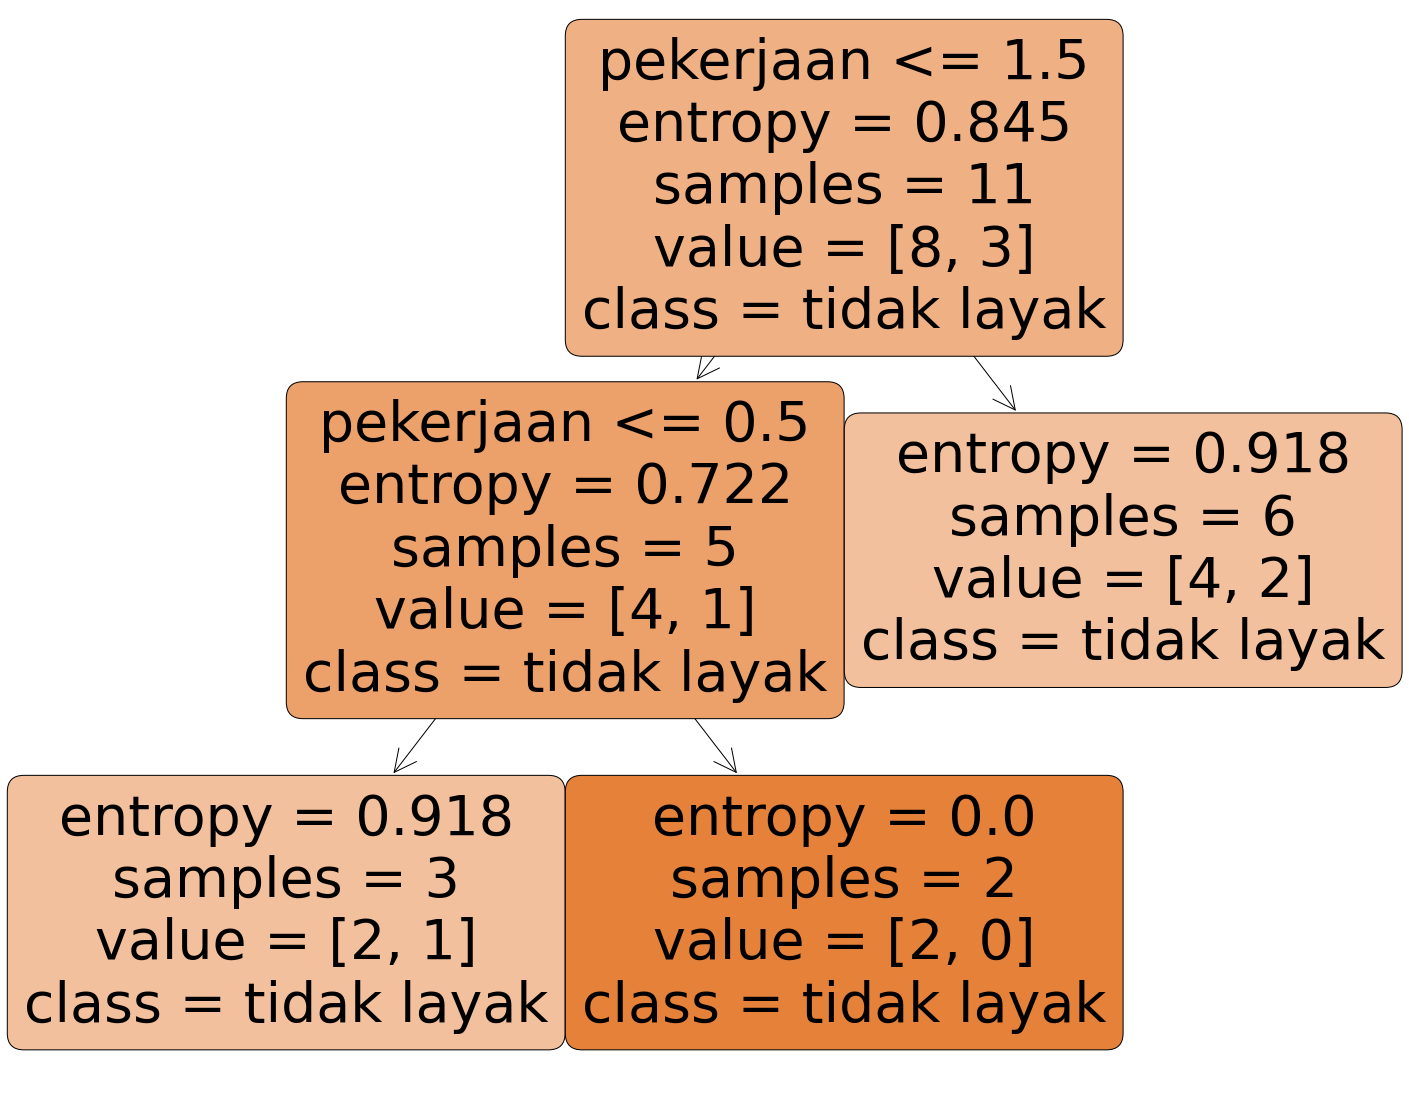

In [ ]:
feature_names = df.columns[:5]
target_names = df['layakkredit'].unique().tolist()

plot_tree(model, 
          feature_names = feature_names, 
          class_names = target_names, 
          filled = True, 
          rounded = True)

plt.savefig('tree_visualization.png') 